# Worked Problem Assignment 1

### <p style="text-align: right;">  Kyle Taft

In [4]:
# Import packages
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

____
My problem is inspired by the problem set from "Intoduction to Classical Mechanics" by David Morin. The problem is summarized as follows: 

Consider two connected masses dangling downwards from a string with two pullys inbetween them. To complicate the problem, the mass on the right act as a pendulum and swings back and forth. Find the equations of motions for the pendulum. An image of the setup is shown below (Morin, 2008).

In [17]:
Image(url= "https://github.com/KyleTaft/Fall23/blob/3f581f0d3d895961381bbc7e7ead03d7e612ce55/PHY415/images/Screenshot%202023-09-14%20035935.png?raw=true", width=400)

In [26]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, g):

    r, v, theta, omega = curr_vals
    
    vdot = 0.5*(r*omega**2 - g*(1-np.cos(theta)))

    omegadot = (-2*v*omega - g*np.sin(theta)*r)/r**2

    return v, vdot, omega, omegadot

# 2. Time Setup
tmax = 100
dt = 0.1 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
c = 1
g = 9.81
x0 = [2.6,0,0.1,0.1] 

# 4. Call Integrator 
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, ), method="RK45")

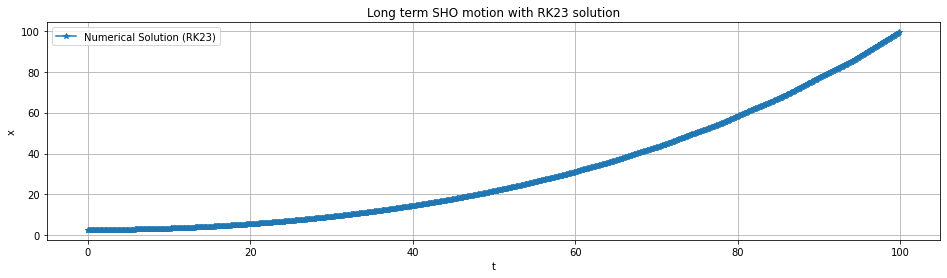

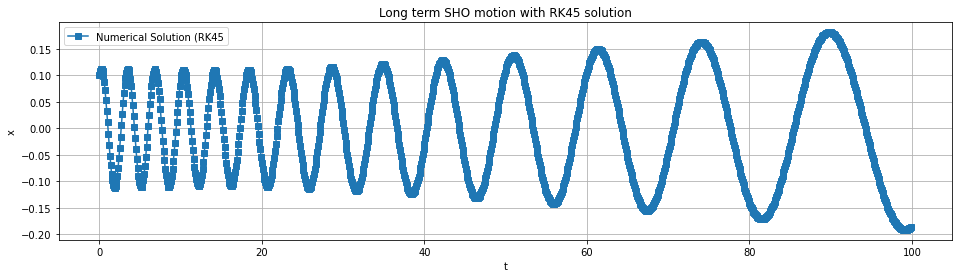

In [27]:
plt.figure(figsize=(16, 4))
#plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, solved.y[0], label = "Numerical Solution (RK23)", marker='*')
plt.title("Long term SHO motion with RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
#plt.plot(t,analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t,solved.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Long term SHO motion with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()